<a href="https://colab.research.google.com/github/JakeOh/202007_itw_bd18/blob/master/lab_python/python61_datetime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Python datetime 모듈(datetime.py 파일)
  * datetime 클래스: 날짜(date), 시간(time)과 관련된 정보들을 저장, 메서드를 포함.

In [2]:
# import module_name
# module_name.class_name[function_name, variable_name, ...]

# from module_name import class_name[function_name, variable, ...]
# class_name[function_name, ...]

from math import sqrt
sqrt(2)

1.4142135623730951

In [3]:
import datetime  # datetime 모듈을 임포트(메모리 로드)

datetime.datetime.now()  # datetime 모듈의 datetime 클래스의 now() 메서드를 호출

datetime.datetime(2020, 10, 13, 0, 57, 13, 820884)

In [4]:
from datetime import datetime  # datetime 모듈의 datetime 클래스만 임포트(메모리 로드)

datetime.now()  # datetime 클래스의 now() 메서드를 호출.

datetime.datetime(2020, 10, 13, 0, 59, 21, 855196)

In [7]:
# datetime.now(): OS의 시간대(time zone)에서의 현재 시간을 리턴.
now = datetime.now()
print(now)  #> Google Colab 환경에서 설정된 시간대의 현재 날짜/시간 정보를 리턴 -> UTC+00:00
# UTC: Coordinate Universal Timezone
# KST: Korean Standard Timezone, 한국 표준시(UTC+09:00)

2020-10-13 01:11:16.859857


In [8]:
# datetime 생성자 함수(constructor function): 특정 날짜/시간으로 datetime 객체를 생성
date1 = datetime(year=2020, month=10, day=13)
print(date1)

2020-10-13 00:00:00


In [12]:
date2 = datetime(year=2020, month=10, day=14, hour=10, minute=17)
print(date2)

2020-10-14 10:17:00


In [13]:
print(date2 - date1)

1 day, 10:17:00


* datetime(날짜/시간) 객체 <--> str(문자열) 변환
  * `datetime.strptime(문자열, 포맷문자열)`: 문자열을 datetime 객체로 변환(parsing).
  * `datetime.strftime(포맷문자열)`: datetime 객체를 문자열로 변환(formatting)


In [19]:
now = datetime.now()
print(now)
print(now.strftime('%Y/%m/%d'))
print(now.strftime('%y/%m/%d'))
print(now.strftime('%b. %d, %y'))
print(now.strftime('%B %d, %y'))
# %Y: 4자리 연도(year), %y: 2자리 연도
# %m: 2자리 월(month), %b: 월 이름 약자, %B: 월 이름
# %d: 2자리 일(day)

2020-10-13 01:50:17.023345
2020/10/13
20/10/13
Oct. 13, 20
October 13, 20


In [26]:
date3 = datetime(2020, 10, 13, 14, 30, 0)
print(date3)
print(date3.strftime('%H:%M:%S'))
print(date3.strftime('%I:%M:%S %p'))
# %H: 24시간 형식 시간(hour), 00 ~ 23
# %I: 12시간 형식 시간(hour), 1 ~ 12
# %M: 2자리 분(minute), 00 ~ 59
# %S: 2자리 초(second), 00 ~ 59

2020-10-13 14:30:00
14:30:00
02:30:00 PM


In [29]:
print(datetime.strptime('2020-10-13', '%Y-%m-%d'))
print(datetime.strptime('20-10-13', '%y-%m-%d'))
print(datetime.strptime('20-10-13', '%d-%m-%y'))

2020-10-13 00:00:00
2020-10-13 00:00:00
2013-10-20 00:00:00


* timestamp(UNIX time, POSIX time, epoch time, ...):
  1970년 1월 1일 0시 0분 0초를 시작으로 해서 1초마다 1씩 증가하는 숫자.
* `datetime.timestamp()`: datetime 객체 -> timestamp(숫자)
* `datetime.fromtimestamp(숫자)`: timestamp(숫자) -> datetime 객체.

In [36]:
now = datetime.now()
print(now)
print(now.timestamp())
print(datetime.fromtimestamp(1602556762))

2020-10-13 02:40:31.926031
1602556831.926031
2020-10-13 02:39:22


* https://github.com/wesm/pydata-book/tree/2nd-edition/datasets/movielens/
의 데이터 파일 중 ratings.dat 파일을 읽어서 데이터 프레임을 생성.
* 데이터 프레임에 dt 컬럼을 추가 - timestamp 컬럼의 숫자들을 datetime 객체로 변환한 값을 저장.

In [39]:
import pandas as pd

data_file = 'https://github.com/wesm/pydata-book/blob/2nd-edition/datasets/movielens/ratings.dat?raw=true'
ratings = pd.read_csv(data_file,
                      sep='::',
                      header=None,
                      names=['user_id', 'movie_id', 'rating', 'timestamp'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  import sys


In [40]:
ratings.head()

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [41]:
print(datetime.fromtimestamp(978300760))

2000-12-31 22:12:40


In [42]:
ratings.tail()

,user_id,movie_id,rating,timestamp
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648
1000208,6040,1097,4,956715569


In [43]:
print(datetime.fromtimestamp(956715569))

2000-04-26 02:19:29


In [47]:
dates = []  # timestamp를 datetime 객체로 변환한 값들을 저장할 리스트
for ts in ratings['timestamp']:  # timestamp 컬럼의 값들을 반복하면서
    dt = datetime.fromtimestamp(ts)  # timestamp(숫자)를 datetime 객체로 변환.
    dates.append(dt)  # 변환된 datetime 객체를 리스트에 추가.

# dates 리스트를 pd.Series로 변환 후, 데이터 프레임의 새로운 컬럼으로 추가.
ratings['dt'] = pd.Series(dates)

In [48]:
ratings.head()

,user_id,movie_id,rating,timestamp,dt
0,1,1193,5,978300760,2000-12-31 22:12:40
1,1,661,3,978302109,2000-12-31 22:35:09
2,1,914,3,978301968,2000-12-31 22:32:48
3,1,3408,4,978300275,2000-12-31 22:04:35
4,1,2355,5,978824291,2001-01-06 23:38:11


In [46]:
ratings.tail()

,user_id,movie_id,rating,timestamp,dt
1000204,6040,1091,1,956716541,2000-04-26 02:35:41
1000205,6040,1094,5,956704887,2000-04-25 23:21:27
1000206,6040,562,5,956704746,2000-04-25 23:19:06
1000207,6040,1096,4,956715648,2000-04-26 02:20:48
1000208,6040,1097,4,956715569,2000-04-26 02:19:29


In [49]:
ratings.dtypes

user_id               int64
movie_id              int64
rating                int64
timestamp             int64
dt           datetime64[ns]
dtype: object

In [50]:
ratings['timestamp'].min(), ratings['timestamp'].max()

(956703932, 1046454590)

In [53]:
ratings['dt'].min(), ratings['dt'].max()

(Timestamp('2000-04-25 23:05:32'), Timestamp('2003-02-28 17:49:50'))

* datetime 객체에서 날짜/시간 정보 추출하는 방법

In [59]:
now = datetime.now()
print(now)
print(now.year, now.month, now.day, now.hour, now.minute, now.second)

2020-10-13 04:56:59.358241
2020 10 13 4 56 59


* datetime 객체를 저장하는 Series에서 날짜/시간 정보를 추출하는 방법:
  pandas.Series.dt.속성[메서드, ...]

In [66]:
ratings['dt'].dt.year

0          2000
1          2000
2          2000
3          2000
4          2001
           ... 
1000204    2000
1000205    2000
1000206    2000
1000207    2000
1000208    2000
Name: dt, Length: 1000209, dtype: int64

* ratings 데이터 프레임에 year, month, quarter(분기) 컬럼을 추가

In [68]:
ratings['year'] = ratings['dt'].dt.year
ratings['month'] = ratings['dt'].dt.month
ratings['quarter'] = ratings['dt'].dt.quarter

ratings.head()

,user_id,movie_id,rating,timestamp,dt,year,month,quarter
0,1,1193,5,978300760,2000-12-31 22:12:40,2000,12,4
1,1,661,3,978302109,2000-12-31 22:35:09,2000,12,4
2,1,914,3,978301968,2000-12-31 22:32:48,2000,12,4
3,1,3408,4,978300275,2000-12-31 22:04:35,2000,12,4
4,1,2355,5,978824291,2001-01-06 23:38:11,2001,1,1


In [69]:
ratings.tail()

,user_id,movie_id,rating,timestamp,dt,year,month,quarter
1000204,6040,1091,1,956716541,2000-04-26 02:35:41,2000,4,2
1000205,6040,1094,5,956704887,2000-04-25 23:21:27,2000,4,2
1000206,6040,562,5,956704746,2000-04-25 23:19:06,2000,4,2
1000207,6040,1096,4,956715648,2000-04-26 02:20:48,2000,4,2
1000208,6040,1097,4,956715569,2000-04-26 02:19:29,2000,4,2


* ratings 데이터 프레임에서 2003년 2월 데이터만 추출

In [70]:
ratings[(ratings['dt'].dt.year == 2003) & 
        (ratings['dt'].dt.month == 2)]

,user_id,movie_id,rating,timestamp,dt,year,month,quarter
27759,195,1254,4,1044552222,2003-02-06 17:23:42,2003,2,1
27764,195,1183,3,1044988494,2003-02-11 18:34:54,2003,2,1
27781,195,3007,4,1044987990,2003-02-11 18:26:30,2003,2,1
27846,195,1356,2,1045358834,2003-02-16 01:27:14,2003,2,1
27895,195,2247,2,1045356507,2003-02-16 00:48:27,2003,2,1
...,...,...,...,...,...,...,...,...
984842,5950,3317,3,1046369439,2003-02-27 18:10:39,2003,2,1
984847,5950,3328,3,1046369090,2003-02-27 18:04:50,2003,2,1
984849,5950,111,5,1046368241,2003-02-27 17:50:41,2003,2,1
984861,5950,3363,5,1046367948,2003-02-27 17:45:48,2003,2,1


* ratings 데이터 프레임에서 2002년 1분기 데이터만 추출

In [71]:
ratings[(ratings['year'] == 2002) &
        (ratings['quarter'] == 1)]

,user_id,movie_id,rating,timestamp,dt,year,month,quarter
5025,36,3359,5,1015905485,2002-03-12 03:58:05,2002,3,1
5034,36,581,4,1015905127,2002-03-12 03:52:07,2002,3,1
5053,36,7,4,1012707697,2002-02-03 03:41:37,2002,2,1
5060,36,1191,4,1015905249,2002-03-12 03:54:09,2002,3,1
5073,36,1912,5,1015904924,2002-03-12 03:48:44,2002,3,1
...,...,...,...,...,...,...,...,...
994088,6002,2764,4,1014524069,2002-02-24 04:14:29,2002,2,1
994092,6002,3729,4,1014524511,2002-02-24 04:21:51,2002,2,1
994096,6002,3733,4,1014524481,2002-02-24 04:21:21,2002,2,1
994100,6002,2013,4,1014524679,2002-02-24 04:24:39,2002,2,1


* pandas.to_datetime() 함수: 문자열/숫자 등을 datetime 객체로 변환

In [74]:
# 문자열 -> datetime 객체 변환
print(pd.to_datetime('2020-10-12'))
print(pd.to_datetime('10-12-2020'))
print(pd.to_datetime('10-12-2020', dayfirst=True))

2020-10-12 00:00:00
2020-10-12 00:00:00
2020-12-10 00:00:00


In [77]:
# 옵션들의 기본값: dayfirst=False, yearfirst=False
print(pd.to_datetime('20-10-12', yearfirst=True))
print(pd.to_datetime('20-10-12', dayfirst=True))

2020-10-12 00:00:00
2012-10-20 00:00:00


In [79]:
# 숫자(정수, 실수) -> datetime 변환
print(pd.to_datetime(1014523779, unit='s'))

2002-02-24 04:09:39


In [82]:
pd.to_datetime(ratings.loc[0:2, 'timestamp'], unit='s')

0   2000-12-31 22:12:40
1   2000-12-31 22:35:09
2   2000-12-31 22:32:48
Name: timestamp, dtype: datetime64[ns]

In [83]:
ratings['dt2'] = pd.to_datetime(ratings['timestamp'], unit='s')
ratings

,user_id,movie_id,rating,timestamp,dt,year,month,quarter,dt2
0,1,1193,5,978300760,2000-12-31 22:12:40,2000,12,4,2000-12-31 22:12:40
1,1,661,3,978302109,2000-12-31 22:35:09,2000,12,4,2000-12-31 22:35:09
2,1,914,3,978301968,2000-12-31 22:32:48,2000,12,4,2000-12-31 22:32:48
3,1,3408,4,978300275,2000-12-31 22:04:35,2000,12,4,2000-12-31 22:04:35
4,1,2355,5,978824291,2001-01-06 23:38:11,2001,1,1,2001-01-06 23:38:11
...,...,...,...,...,...,...,...,...,...
1000204,6040,1091,1,956716541,2000-04-26 02:35:41,2000,4,2,2000-04-26 02:35:41
1000205,6040,1094,5,956704887,2000-04-25 23:21:27,2000,4,2,2000-04-25 23:21:27
1000206,6040,562,5,956704746,2000-04-25 23:19:06,2000,4,2,2000-04-25 23:19:06
1000207,6040,1096,4,956715648,2000-04-26 02:20:48,2000,4,2,2000-04-26 02:20:48


https://github.com/wesm/pydata-book/raw/2nd-edition/examples/spx.csv 파일을 읽어서 데이터 프레임 생성

In [87]:
file_path = 'https://github.com/wesm/pydata-book/raw/2nd-edition/examples/spx.csv'
spx = pd.read_csv(file_path, header=0, names=['Date', 'Price'])

In [88]:
spx.head()

,Date,Price
0,1990-02-01 00:00:00,328.79
1,1990-02-02 00:00:00,330.92
2,1990-02-05 00:00:00,331.85
3,1990-02-06 00:00:00,329.66
4,1990-02-07 00:00:00,333.75


In [89]:
spx.dtypes  # 데이터 프레임 각 컬럼의 데이터 타입
#> Date 컬럼의 데이터 타입은 object(문자열)

Date      object
Price    float64
dtype: object

In [90]:
# Date 컬럼의 데이터 타입을 datetime으로 변환
spx['Date'] = pd.to_datetime(spx['Date'])
spx.dtypes  #> Date 컬럼의 데이터 타입은 datetime

Date     datetime64[ns]
Price           float64
dtype: object

In [92]:
spx['Date'].min(), spx['Date'].max()

(Timestamp('1990-02-01 00:00:00'), Timestamp('2011-10-14 00:00:00'))

In [93]:
# read_csv() 함수를 호출할 때 특정 컬럼들을 datetime으로 변환(parsing)하겠다고 설정.
df = pd.read_csv(file_path, header=0, names=['Date', 'Price'],
                 parse_dates=['Date'])

In [94]:
df.head()

,Date,Price
0,1990-02-01,328.79
1,1990-02-02,330.92
2,1990-02-05,331.85
3,1990-02-06,329.66
4,1990-02-07,333.75


In [95]:
df.dtypes

Date     datetime64[ns]
Price           float64
dtype: object

In [99]:
# df에서 연도별 Price의 평균을 계산해보세요.
# 1) df에 Year 변수(컬럼)을 추가
df['Year'] = df['Date'].dt.year
# df.tail()

# 2) Year별 Price의 평균
df_yearly = df.groupby('Year')[['Price']].mean()
df_yearly.head()

,Price
Year,
1990,334.123506
1991,376.186324
1992,415.747008
1993,451.614822
1994,460.416508


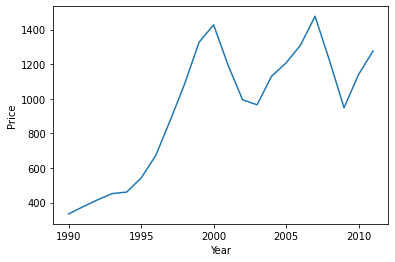

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.lineplot(x=df_yearly.index, y='Price', data=df_yearly)
plt.show()

In [104]:
# 2011년 1월 데이터만 선택
df[(df['Date'].dt.year == 2011) & (df['Date'].dt.month == 1)]

,Date,Price,Year
5273,2011-01-03,1271.87,2011
5274,2011-01-04,1270.20,2011
5275,2011-01-05,1276.56,2011
5276,2011-01-06,1273.85,2011
5277,2011-01-07,1271.50,2011
5278,2011-01-10,1269.75,2011
5279,2011-01-11,1274.48,2011
5280,2011-01-12,1285.96,2011
5281,2011-01-13,1283.76,2011
5282,2011-01-14,1293.24,2011


* datetime 타입의 인덱스를 사용한 인덱싱

In [105]:
# df 데이터 프레임에서 Date 컬름을 인덱스로 변환.
df_with_index = df.set_index('Date')
df_with_index

,Price,Year
Date,,
1990-02-01,328.79,1990
1990-02-02,330.92,1990
1990-02-05,331.85,1990
1990-02-06,329.66,1990
1990-02-07,333.75,1990
...,...,...
2011-10-10,1194.89,2011
2011-10-11,1195.54,2011
2011-10-12,1207.25,2011


In [106]:
df_with_index.index

DatetimeIndex(['1990-02-01', '1990-02-02', '1990-02-05', '1990-02-06',
               '1990-02-07', '1990-02-08', '1990-02-09', '1990-02-12',
               '1990-02-13', '1990-02-14',
               ...
               '2011-10-03', '2011-10-04', '2011-10-05', '2011-10-06',
               '2011-10-07', '2011-10-10', '2011-10-11', '2011-10-12',
               '2011-10-13', '2011-10-14'],
              dtype='datetime64[ns]', name='Date', length=5472, freq=None)

In [107]:
# 특정 날짜 선택
df_with_index.loc['2011-01-03']

Price    1271.87
Year     2011.00
Name: 2011-01-03 00:00:00, dtype: float64

In [108]:
# 날짜 (형식 문자열)를 사용한 슬라이싱
df_with_index.loc['2011-01-03':'2011-01-10']

,Price,Year
Date,,
2011-01-03,1271.87,2011
2011-01-04,1270.20,2011
2011-01-05,1276.56,2011
2011-01-06,1273.85,2011
2011-01-07,1271.50,2011
2011-01-10,1269.75,2011


In [109]:
# DateTimeIndex를 사용한 특정 월 선택
df_with_index.loc['2011-01']

,Price,Year
Date,,
2011-01-03,1271.87,2011
2011-01-04,1270.20,2011
2011-01-05,1276.56,2011
2011-01-06,1273.85,2011
2011-01-07,1271.50,2011
2011-01-10,1269.75,2011
2011-01-11,1274.48,2011
2011-01-12,1285.96,2011
2011-01-13,1283.76,2011


In [110]:
# DateTimeIndex를 사용하면, 날짜/월/년도 slicing이 가능.
df_with_index.loc['2011-01':'2011-02']

,Price,Year
Date,,
2011-01-03,1271.87,2011
2011-01-04,1270.20,2011
2011-01-05,1276.56,2011
2011-01-06,1273.85,2011
2011-01-07,1271.50,2011
2011-01-10,1269.75,2011
2011-01-11,1274.48,2011
2011-01-12,1285.96,2011
2011-01-13,1283.76,2011


In [115]:
# DateTimeIndex가 있는 경우 groupby
# df_with_index.index.year
df_with_index.groupby(df_with_index.index.year)[['Price']].mean()

,Price
Date,
1990,334.123506
1991,376.186324
1992,415.747008
1993,451.614822
1994,460.416508
1995,541.719087
1996,670.494843
1997,873.427787
1998,1085.503254


CSV 파일의 날짜 정보가 있는 경우
* pd.read_csv(): 데이터 프레임 생성. parse_dates 파라미터에 컬럼(들)의 리스트를 설정. index_col 파라미터 설정.
* pd.to_datetime(): 컬럼의 데이터 타입을 datetime 타입으로 변환.
* pd.DataFrame.set_index(): datetime 타입의 컬럼을 인덱스(DateTimeIndex)로 설정.

In [121]:
# spx.csv 파일을 읽어서 데이터 프레임을 생성.
df2 = pd.read_csv(file_path, header=0, names=['Date', 'Price'],
                  parse_dates=['Date'],
                  index_col='Date')

In [122]:
df2.dtypes

Price    float64
dtype: object

In [123]:
df2.index

DatetimeIndex(['1990-02-01', '1990-02-02', '1990-02-05', '1990-02-06',
               '1990-02-07', '1990-02-08', '1990-02-09', '1990-02-12',
               '1990-02-13', '1990-02-14',
               ...
               '2011-10-03', '2011-10-04', '2011-10-05', '2011-10-06',
               '2011-10-07', '2011-10-10', '2011-10-11', '2011-10-12',
               '2011-10-13', '2011-10-14'],
              dtype='datetime64[ns]', name='Date', length=5472, freq=None)

In [124]:
df2.head()

,Price
Date,
1990-02-01,328.79
1990-02-02,330.92
1990-02-05,331.85
1990-02-06,329.66
1990-02-07,333.75


In [128]:
# 연도별 Price 평균
df2.groupby(df2.index.year)[['Price']].mean()

,Price
Date,
1990,334.123506
1991,376.186324
1992,415.747008
1993,451.614822
1994,460.416508
1995,541.719087
1996,670.494843
1997,873.427787
1998,1085.503254


In [130]:
# 연도별, 월별 Price 평균
df2.groupby([df2.index.year, df2.index.month])[['Price']].mean()

Price
Date Date             
1990 2      330.452632
     3      338.465000
     4      338.178000
     5      350.250000
     6      360.386667
...                ...
2011 6     1287.288636
     7     1325.184500
     8     1185.305652
     9     1173.879048
     10    1171.356000

[261 rows x 1 columns]

In [134]:
df2.resample('Y', kind='period')[['Price']].mean()

,Price
Date,
1990,334.123506
1991,376.186324
1992,415.747008
1993,451.614822
1994,460.416508
1995,541.719087
1996,670.494843
1997,873.427787
1998,1085.503254


In [136]:
df2.resample('M', kind='period')[['Price']].mean()

,Price
Date,
1990-02,330.452632
1990-03,338.465000
1990-04,338.178000
1990-05,350.250000
1990-06,360.386667
...,...
2011-06,1287.288636
2011-07,1325.184500
2011-08,1185.305652


In [137]:
df2.resample('Q', kind='period')[['Price']].mean()

,Price
Date,
1990Q1,334.751951
1990Q2,349.796508
1990Q3,335.881746
1990Q4,316.562031
1991Q1,352.282951
...,...
2010Q4,1204.585625
2011Q1,1302.529032
2011Q2,1318.332857
